## 1. Show me the Credit

- I am completing a kaggle competetion called show me the credit
- The competetion provides two data sets: a test set and and a training set
- I have done some work on the training set and I'll be presenting it today
- I used spyder for my work and I already knew what the data looked like while writing this notebook; treate it as a documentation of the project that does not reflect the order of the work 



### 1.1 Importing packages
- I have imported packages I am **definately** using: Pandas(and numpy) to read and examine the data; matplotlib and seaborn to plot
- I also know that i'll be using knn to impute values and logistical regression to predict classes 

In [1]:
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import numpy as np

In [2]:

user_cols = ['dlq' , 'total_lines', 'age', 'past_30', 'debtratio', 
             'income', 'credit_lines', 'past_90', 'home_lines',
             'past_60', 'dep_count']
             

Variable Name:

SeriousDlqin2yrs
RevolvingUtilizationOfUnsecuredLines
age
NumberOfTime30-59DaysPastDueNotWorse
DebtRatio
MonthlyIncome
NumberOfOpenCreditLinesAndLoans
NumberOfTimes90DaysLate
NumberRealEstateLoansOrLines
NumberOfTime60-89DaysPastDueNotWorse
NumberOfDependents

Description:

Person experienced 90 days past due delinquency or worse 
Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits
Age of borrower in years
Number of times borrower has been 30-59 days past due but no worse in the last 2 years.
Monthly debt payments, alimony,living costs divided by monthy gross income
Monthly income
Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards)
Number of times borrower has been 90 days or more past due.
Number of mortgage and real estate loans including home equity lines of credit
Number of times borrower has been 60-89 days past due but no worse in the last 2 years.
Number of dependents in family excluding themselves (spouse, children etc.)

In [3]:
training = pd.read_table('cs-training.csv', sep=',', header=False,\
 names=user_cols)
#read file, changed index, changed names
 
test = pd.read_table('cs-test.csv', sep = ',', header=False,\
names=user_cols)


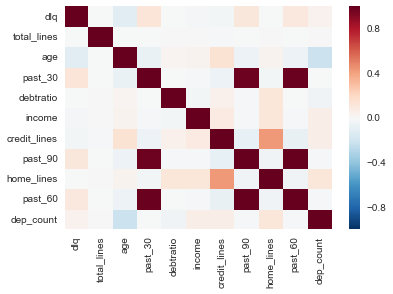

In [16]:
%matplotlib inline
sns.heatmap(training.corr())


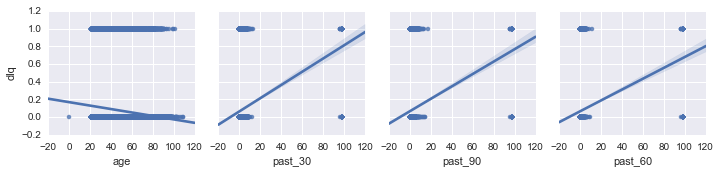

In [17]:
sns.pairplot(training, x_vars=['age', 'past_30', 'past_90',\
             'past_60'], y_vars='dlq', kind='reg')

####How each feature relates to the response

In [18]:
training.isnull().sum()

dlq                 0
total_lines         0
age                 0
past_30             0
debtratio           0
income          29731
credit_lines        0
past_90             0
home_lines          0
past_60             0
dep_count        3924
dtype: int64

####Observations: 

    1) There is a lot of missing values, in income and dependent columns
    2) My approach of using KNN to impute missing values failed: I got an accuracy of 3,6% and it took over 10 
    minutes to compute the values
    
 

## 2) Brief Outline for the future and justifications:

### 2.1) Filling missing values
        1.1) Using Impute function in KNN, which can impute either mean, median or mode 
        1.2) retrying Knn apporach
### 2.2) Regression 
        2.1) It is vely likely that the first thing I'll be doing is running logistical regression to calulate probabilities using features provided by the competetion 

In [24]:
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)
imp.fit(training.dep_count)
training_imputed_i = imp.transform(training.dep_count)

In [26]:
training_imputed_i

array([[ 2.,  1.,  0., ...,  0.,  0.,  0.]])

In [5]:
training.dep_count.fillna(value=0, inplace=True)
training_imp = training.dropna()  
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.cross_validation import train_test_split
from sklearn import neighbors
yi = training_imp.income
Xi = training_imp[['total_lines', 'age', 'past_30', 'debtratio', 
             'credit_lines', 'past_90', 'home_lines',
             'past_60', 'dep_count']]

In [6]:
Xi_train, Xi_test, yi_train, yi_test = train_test_split(Xi, yi, \
test_size=0.4, random_state=4)

In [7]:
for i, weights in enumerate(['uniform', 'distance']):
   knn = KNeighborsClassifier(n_neighbors=500, weights=weights)
   y_ = knn.fit(Xi_train, yi_train)
    
    

In [ ]:
#yi_pred = knn.predict(Xi_test)
#print metrics.accuracy_score(yi_test, yi_pred)

In [1]:
from sklearn.neighbors import BallTree

In [2]:
sns.pairplot(test, x_vars=['age', 'past_30', 'past_90',\
             'past_60'], y_vars='dlq', kind='reg')

NameError: name 'sns' is not defined

In [ ]:
sns.pairplot(training, x_vars=['age', 'past_30', 'past_90',\
             'past_60'], y_vars='dlq', kind='reg')